<a href="https://colab.research.google.com/github/astroviki/NumericalMethods/blob/main/Integrace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# for Table of Contents use:
#
# pip install jupyter_contrib_nbextensions
# jupyter contrib nbextension install --sys-prefix
# jupyter nbextension enable scratchpad/main --sys-prefix
#
%%capture
!pip install jupyterthemes
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.subplots import make_subplots
from jupyterthemes import jtplot


jtplot.style(theme='gruvboxd')

# Integrace Funkce
Integrace funkce patří mezi nejčastější problémy, se kterými se můžete setkat v praxi. Na rozdíl od učebnic, ve vetšině případů jsou funkce analyticky neintegrovatelné a jejich integrál je tak nutné hledat numerickou cestou. 

Celá podstata problému numerické integrace spočívá v obecně v aproximaci integrace funkce sumací jejich reprezentativních funkčních hodnot

$$
\int_a^b f(x){\rm d}x \approx \sum_{i=0}^{n-1}c_i f(x_i)
$$

Velkou skupinu tvoří integrační metody, které využívají k numerickému výpočtu interpolační funkci v podobě polynomu. Vzhledem k vlastnostem polynomu, především oscilaci polynomu vyšších řádu při interpolaci mezi body, jsou praxi využívány polynomy nižších řádu.

## Obdelníková metoda

První metoda, kterí nás zcela jistě napadne, vychází z *Riemannovy* definice určitého integrálu. Integrál je nahrazen sumou ve tvaru

\begin{equation}
\sum_i^N f(x_i^*)(x_i-x_{i-1})\,, x_i^* \in [x_{i-1},x_i]
\end{equation}
Výběr bodu je libovolný, v naší metodě použijeme střed intervalu
\begin{equation}
\int_a^b f(x){\rm d}x = {\Delta x}\sum_{k=1}^N f\left(\frac{x_{k-1}+x_k}{2}\right) 
\end{equation}

Když se zamyslíme, zjistíme že podstata metody je jednoduchá, nahrazujeme průběh funkce na daném intervalu konstantní funkcí, tedy polynomem nultého stupně.

Text(0.5, 1.0, 'Obdelníková metoda, N = 10')

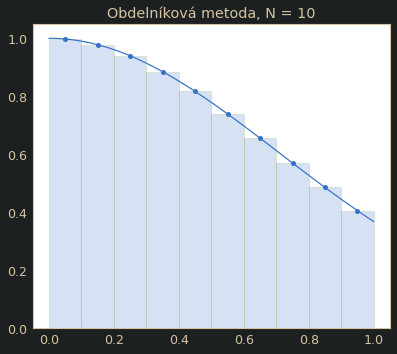

In [36]:
a = 0    # left interval
b = 1    # right interval
N = 10  # number of points

# Definition of function
def fce(x):
  return np.exp(-x**2)

# Points for rectangle calculation
x = np.linspace(a,b,N+1)

# Points of graph
x_plot = np.linspace(a,b,10*N+1)
y_plot = fce(x_plot)

plt.plot(x_plot,y_plot,'b')
ax = plt.gca()
ax.set_facecolor("w")
ax.grid(False)
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = fce(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10,color='b')
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='g', linewidth=1.0)
plt.title('Obdelníková metoda, N = {}'.format(N))

### Algoritmus metody
---
* Stanovíme počet bodů $N+1$ na daném intervalu $(a,b)$.
* Body $x_0,\dots,x_{N+1}$ nám dělí interval na $N$ podintervalů.
* V každém intervalu určíme střed $\frac{x_{i-1}+x_{i}}{2}$ a v něm vyčíslíme integrovanou funkci.
* Určíme odhad integralu podle vzorce $\frac{b-a}{N}\left(
  \sum_{i=1}^{N} f(\frac{x_{i-1}+x_i}{2})\right)$
---
### Úkol:
S pomocí výše zmíněné metody integrujte funkci $e^{-x^2}$ na intervalu (0,1). Výsledek porovnejte s analytickým výrazem.


In [9]:
# Function calculate integral using Riemann midpoint method
def midpointInt(fce,a,b,n):
  x = np.linspace(a,b,n+1)
  sum_parentheses = (b-a)/((n))*(np.sum(fce((x[:-1]+x[1:])*0.5)))
  return sum_parentheses

midpointInt(fce,a,b,N)


0.7468271984923199

## Lichoběžníková metoda
<img src='https://github.com/astroviki/NumericalMethods/blob/main/PDE/Images/trapez.png?raw=1' align='right'></img>
Metoda spočívá v aproximaci určitého integrálu součtem obsahu lichoběžníků,

\begin{equation}
\int_a^b f(x){\rm d}x = \frac{\Delta x}{2}\sum_{k=1}^N (f(x_{k+1})+f(x_k)) = \frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right),
\end{equation}

které tvoří na daném intervalu $(a,b)$ sada $N$ ekvidistantních bodů.

### Algoritmus

* Stanovíme počet bodů $N$ na daném intervalu $(a,b)$, v těchto bodech vyčíslíme integrovanou funkci
* Určíme odhad integralu podle vzorce $\frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right)$

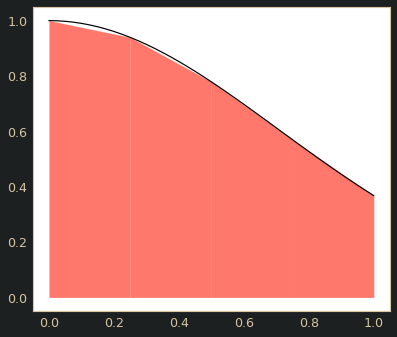

In [73]:
a = 0    # left interval
b = 1    # right interval
N = 4 # number of points

# Definition of function
def fce(x):
  return np.exp(-x**2)

# Points for rectangle calculation
x = np.linspace(a,b,N+1)

# Points of graph
x_plot = np.linspace(a,b,10*N+1)
y_plot = fce(x_plot)

plt.plot(x_plot,y_plot,'black')
ax = plt.gca()
ax.set_facecolor('w')
ax.grid(False)
for i in range(N):
  plt.fill_between([x[i],x[i+1]],[fce(x[i]),fce(x[i+1])],color=(1.0, 0.47, 0.42),linewidth=0.1,edgecolor='black')


In [3]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

### Úkoly:

*   Opakujte integraci funkce $e^{-x^2}$ na intervalu (0,1)
*   Porovnejte rychlost konvergence s předchozí metodou



## Simpsonova metoda
 
 Metoda spočívá v aproximaci určitého integrálu součtem obsahu parabol,

\begin{equation}
\int_a^b f(x){\rm d}x = \frac{\Delta x}{3}\left(f(x_0)+\sum_{j=1}^{n/2-1}f(x_{2j})+4\sum_{j=1}^{n/2}f(x_{2j-1})+f(x_n)\right)
\end{equation}

kde $x_j = a + jh$, $x_0=a$ a $x_n=b$.

### Algoritmus

* Předem určíme **sudý** počet bodů $N$ na daném intervalu $(a,b)$, v těchto bodech vyčíslíme integrovanou funkci
* Určíme odhad integralu podle vzorce $\frac{b-a}{2N}\left(f(x_1)+2f(x_2)+2f(x_3)+\dots 2f(x_N)+f(x_{N+1})\right)$  

---
### Nástin odvození vzorce

Nastíním jednodouché odvození vztahu integrace Simpsonovou metodou. Pro zjednodušení výpočtů umístíme startovní bod do bodu $(0,y_1)$

Naším úkolem bude určit obsah plochy pod parabolou 
$$ 
y = ax^2+bx+c 
$$

mezi body $ x_0 = -h$ a $x_3 =h$. Dle zadání parabola prochází body $(x_0,y_0),(x_1,y_1),(x_2,y_2)$ přičemž vzdálenosti mezi body $x_1-x_0 = x_2-x_1 =\Delta x$


Pro obsach plochy platí,

\begin{equation}
A = \int_{-h}^{h}(ax^2+bx+c){\rm d}x = \left[\frac{ax^3}{3}+\frac{bx^2}{2}+cx\right]_{-h}^{h}
\end{equation}

\begin{equation}
A = \left(\frac{ah^3}{3}+\frac{bh^2}{2}+ch\right)-\left(-\frac{ah^3}{3}+\frac{bh^2}{2}-ch\right) = \frac{2ah^3}{3}+2ch = \frac{h}{3}\left(2ah^2+6c\right)
\end{equation}

Výraz dále upravíme a to použitím průchozích bodů, které dosadíme do obecné rovnice paraboly. 

\begin{eqnarray}
y_0 &=& ah^2-bh +c \\
y_1 &=& c \\
y_2 &=& ah^2+bh+c
\end{eqnarray}

Z těchto rovnic můžeme vyjádřit 

\begin{eqnarray}
c &=& y_1 \\
2ah^2 &=& y_0 - 2y_1 + y_2
\end{eqnarray}

To nám umožńuje upravit vzorec 

\begin{equation}
A_1 = \frac{h}{3}\left(y_0-2y_1+y_2+6y_1\right) = \frac{h}{3}\left(y_0+4y_1+y_2\right)
\end{equation}

Pro následující sadu tří bodu obdobně platí

\begin{equation}
A_2 =  \frac{h}{3}\left(y_2+4y_3+y_4\right)
\end{equation}

\begin{equation}
A_{1+2} = \frac{h}{3}\left(y_0+4y_1+2y_2+4y_3+y_4\right)
\end{equation}

Přidámeli další sadu  tří bodů můžeme psát pro výslednou plochu

\begin{equation}
A_{1+2+3} = \frac{h}{3}\left(y_0+4y_1+2y_2+4y_3+2y_4+4y_5+y_6\right)
\end{equation}




In [6]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


In [5]:
def simpsonsRule(n):

    """
    simpsonsRule: (int) -> float
    Parameters:
        n: integer representing the number of segments being used to 
           approximate the integral
    Pre conditions:
        Function bounds() declared that returns lower and upper bounds of integral.
        Function f(x) declared that returns the evaluated equation at point x.
        Parameters passed.
    Post conditions:
        Returns float equal to the approximate integral of f(x) from a to b
        using Simpson's rule.
    Description:
        Returns the approximation of an integral. Works as of python 3.3.2
        REQUIRES NO MODULES to be imported, especially not non standard ones.
        -Code by TechnicalFox
    """

    a,b = bounds()
    sum = float()
    sum += f(a) #evaluating first point
    sum += f(b) #evaluating last point
    width=(b-a)/(2*n) #width of segments
    oddSum = float()
    evenSum = float()
    for i in range(1,n): #evaluating all odd values of n (not first and last)
        oddSum += f(2*width*i+a)
    sum += oddSum * 2
    for i in range(1,n+1): #evaluating all even values of n (not first and last)
        evenSum += f(width*(-1+2*i)+a)
    sum += evenSum * 4
    return sum * width/3

## Gaussova metoda

V předchozích vztazích jsme vždy hledali pro zadané body $x_0,x_1,x_2,\dots x_{n-1},x_n$ odpovídající váhy $w_0,w_1,\dots,w_{n-1},w_n$, tak abychom dosáhli co nejlepšího odhadu integrálu funkce $\int_a^b f(x){\rm d}x$ na zvoleném intervalu $(a,b)$. Fixace bodů, ve kterých vyčíslujeme integrovanou funkci může mít zásadní vliv na přesnost, bylo by tedy vhodné tuto restrikci uvolnit.

Pro zjednodušení následujícího postupu uvažme funkci $f(x)=c_0+c_1x+c_2x^2+c_3x^3$ na intervalu $[-1,1]$. Naše nové zadání zní najít takovou sadu 2 bodů $x_0,x_1$ a odpovídající sadu vah $w_0,w_1$, pro které bude platit

$$
\int_a^b f(x){\rm d}x = w_0f(x_0)+w_1f(x_1)
$$

Z předchozího vztahu plyne
$$
\int_{-1}^{1}(c_0+c_1x+c_2x^2+c_3x^3){\rm d}x =  w_0(c_0+c_1x_0+c_2x_0^2+c_3x_0^3)+w_1(c_0+c_1x_1+c_2x_1^2+c_3x_1^3)
$$

Přeuspořádáním členů v rovnici, tak abychom k sobě dostali koeficienty $c_0,c_1,c_2,c_3$

$$
c_0\left(w_0+w_1 - \int_{-1}^1 {\rm d}x\right) +
c_1\left(w_0x_0+w_1x_1- \int_{-1}^1 {x\rm d}x\right)+
c_2\left(w_0x_0^2+w_1x_1^2-\int_{-1}^1 x^2 {\rm d}x\right)+
c_3\left(w_0x_0^3+w_1x_1^3-\int_{-1}^1 x^3 {\rm d}x\right) = 0
$$

Členy $c_0,c_1,c_2,c_3$ jsou zvoleny náhodně, prot musí pro jejich koeficienty platit, že jsou nulové. Jinak řečeno

\begin{eqnarray}
w_0 + w_1 = \int_{-1}^1 {\rm d}x = 2 \\
w_0x_0+w_1x_1 = \int_{-1}^1x{\rm d}x = 0\\
w_0x_0^2+w_1x_1^2 =\int_{-1}^1x^2{\rm d}x = \frac{2}{3} \\
w_0x_0^3+w_1x_1^3 = \int_{-1}^1x^3{\rm d}x = 0
\end{eqnarray}

Řešení této nelineární soustavy rovnic je sada $w_0 = 1, w_1 = 1, x_0 = -\frac{\sqrt{3}}{3}, x_1 = \frac{\sqrt{3}}{3}$. Výsledný vztah pro výpočet integrálu 

$$
\int_{-1}^{1}f(x){\rm d}x=f\left(-\frac{\sqrt{3}}{3}\right)+f\left(\frac{\sqrt{3}}{3}\right)
$$

In [8]:
def my_f(x):
    return 2*x**2 - 3*x +15 
    
def gauss(f,n,a,b):
    [x,w] = p_roots(n+1)
    G=0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

## Monte Carlo metoda

Všechny předchozí diskutované metody použivali pro určení odhadu integrálu aproximaci funkce s pomocí polynomu. Následující metoda využívá úplně jiného principu a to náhodných čísel. Podle svého principu, který je založen na náhodných číslech a statistice se nazývá metodou *Monte Carlo*

Pro ilustraci principu si integrál funkce napíšeme trochu jinak. Řekněme, že chceme zjistit průměrnou hodnotu funkce $f(x)$ na intervalu $[a,b]$. Z definice platí

$$
\frac{1}{b-a}\int_{a}^bf(x){\rm d}x =<f>
$$

To ale znamená, že pokud známě průměrnou hodnotu funkce, můžeme určit hodnotu integrálu

$$
\int_{a}^{b}f(x){\rm d}x = (b-a)<f>
$$

Takže náš úkol je, jak nalézt nejlepší odhad průměrné hodnoty zadané funkce. A zde přichází na scénu náhodná čísla. Mějme sadu náhodných čísel, rovnoměrně rozložených v rámci intervalu $[a,b]$. K určení průměrné hodnoty funkce nám stačí spočítat hodnotu funkce v náhodných bodech $f(x_i)$

$$
<f>_N=\frac{1}{N}\sum_{i=1}^{N}f(x_i)
$$

a pro výsledný odhad integrálu metodou *Monte Carlo* můžeme psát

$$
\int_a^bf(x){\rm d}x \approx (b-a)\frac{1}{N}\sum_{i=1}^N f(x_i).
$$

In [11]:
N = 1000
a = 0.0
b = 1.0

# Integrovaná funkce
def fce(x):
  return np.exp(x)

# Funkce pro výpočet integrálu metodou MonteCarlo
#
def integralMC(fce,a,b,n):
  x = np.random.uniform(a,b,n)
  return 1.0/n*np.sum(fce(x))*(b-a)

print('Integral odhad: %.4f versus analytický výpočet: %.4f' % (integralMC(fce,a,b,N),np.exp(1)-1.0))

Integral odhad: 1.6986 versus analytický výpočet: 1.7183


## Vybrané úlohy:

### Příklad 1. Určení parametrů  exoplanety
---
Výzkum a hledání nových exoplanet prožívá v současné době bouřlivý rozvoj. Jedním ze základních úkolů je stanovení jejich základních fyzikálních vlastností. Naneštěstí přímo z pozorování lze většinou stanovit pouze jednu ze základních vlastností, nejčastěji její hmotnost resp. její poloměr. Ostatní vlastnosti musíme určit z modelování jejich vlastností. 

Pokud je známa hmotnost planety, velmi hrubý odhad jejího poloměru můžeme stanovit z předpokladu určitého složení (průměrné hustoty) a rovnoměrného rozložení (ne příliš přesný předpoklad). Například planeta [Gliese 832c](https://en.wikipedia.org/wiki/Gliese_832_c) s hmotností $M=5.40\,M_{Země}$, pokud předpokládáme podobné složení jako má Země, tedy $\rho_{Země}=5520$ $\text{kg.m}^3$, dostáváme $R_{g832c}=(\frac{3M}{4\pi\rho})^{1/3}≈1.75\,R_{Země}$

Tento odhad by platil za předpokladu, že je složení stejné jako Země. Realističtější odhad můžeme dostat použitím předpokládaného profilu hustoty

$$
\rho(r) = \rho_0 \exp{(-rL)}
$$

kde $rho_0$ je hustota ve středu planety a $L$ je charakteristická délka, která závisí na složení. Z numerického modelování vnitřní struktury planet, odhad parametrů pro příklad planety s hmotností $M = 5.40\,M_{Země}$ je zhruba $\rho_0 = 18000$ kg/m3 a $L=6500$ km.

* Integrací přes objem planety a hledáním kořene odhadněte poloměr planety
$$
M(R) = 4\pi \int_0^R R_0 \rho(r) r^2 {\rm d}r 
$$
 a hledáním kořene 
$$
M(R) - M_{\rm observe} = 0
$$
 odhadněte poloměr planety.


---

